In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('datasets/titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.drop(['Name','Ticket','PassengerId','Cabin'],'columns',inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [6]:
titanic_df = titanic_df.dropna()

In [7]:
titanic_df.shape

(712, 8)

In [8]:
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

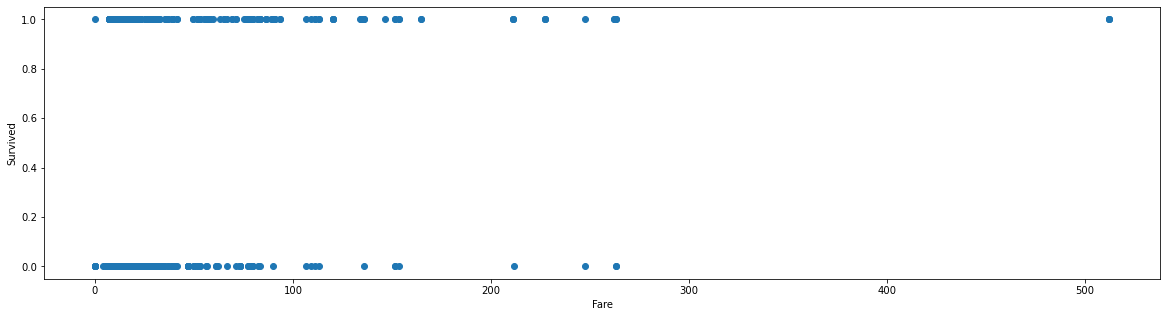

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
plt.scatter(titanic_df['Fare'], titanic_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [11]:
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [12]:
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [13]:
titanic_data_corr = titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<AxesSubplot:>

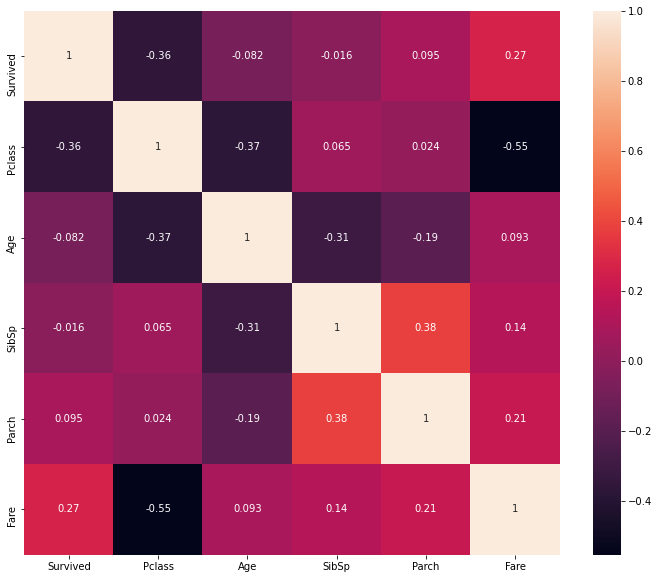

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(titanic_data_corr, annot=True)

In [15]:
from sklearn import preprocessing as prep
label_encoding = prep.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [16]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [17]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [18]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,47.0,1,1,52.5542,0,0,1
1,0,3,1,16.0,0,0,9.2167,0,0,1
2,0,3,1,17.0,0,0,8.6625,0,0,1
3,1,2,0,36.0,0,0,13.0000,0,0,1
4,0,3,0,39.0,0,5,29.1250,0,1,0


In [19]:
titanic_df.to_csv('datasets/titanic_processed_3.csv', index=False)

In [20]:
!dir datasets

 Volume in drive C has no label.
 Volume Serial Number is B803-BFAE

 Directory of C:\sources\python\pythonProject\Classification\datasets

06.03.2021  19:09    <DIR>          .
06.03.2021  19:09    <DIR>          ..
25.02.2019  01:19       133˙047˙193 fashion-mnist_train.csv
25.02.2019  01:19            19˙331 titanic_processed.csv
06.03.2021  18:43            20˙044 titanic_processed_1.csv
06.03.2021  19:05            20˙044 titanic_processed_2.csv
06.03.2021  19:09            20˙044 titanic_processed_3.csv
25.02.2019  01:19            61˙194 titanic_train.csv
               6 File(s)    133˙187˙850 bytes
               2 Dir(s)  20˙186˙402˙816 bytes free
